# Simple Opaque WDM Simulator with Anycast Service Requests written in Java

This notebook contains code in Python used to read the results file output by the simulator.
In the project, you will also find ways to plot the results using Java language.

Dependencies:
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)

Recommended platform:
- Python 3.6
- [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/index.html)

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers = ['*', 'o', 's', '^', 'v', '<', '>']

In [31]:
# listing all the folders with results available and saving the latest one
root_results_path = '../../data/'
last_folder = ''
print('Results folders:')
for folder in sorted(os.listdir(root_results_path)):
    if os.path.isdir(os.path.join(root_results_path, folder)):
        print('\t', folder)
        last_folder = os.path.join(root_results_path, folder)

Results folders:
	 20200215T103335.291
	 20200215T103722.584


In [32]:
# defining the output folder for the plots
output_folder = './images/'
output_format = 'svg' # options are PDF, PNG, ps, etc...

## Reading the results from the average file

The average file already outputs all the averages obtained from all the experiments (seeds) in the simulation.
Therefore, the plotting of averages is very simple.

In [33]:
# load simulation results file
# remember to modify the path according to the file of your simulation

# uncomment the following line to enable loading the latest results
# avg_results_file = os.path.join(root_results_path, folder) + 'results-avg-exp-test-load.csv'

# default value for this repository:
avg_results_file = '../../data/results-avg-test-load.csv'

data_avg = pd.read_csv(avg_results_file, index_col=False).astype({'load': 'int32'})

print('Data loaded:')
for c in data_avg.columns:
    print('\t', c)

loads = sorted(data_avg['load'].unique())
print('Loads:')
for l in loads:
    print('\t', l)
    
policies = sorted(data_avg['policy'].unique())
print('Policies:')
for p in policies:
    print('\t', p)

Data loaded:
	 policy
	 load
	 blocking
	 avgLinkUtil
	 avgProcUtil
	 avgStoUtil
	 avgHopCount
	 avgPathWeight
	 simTime
	 totHoldTime
	 avgHoldTime
Loads:
	 800
	 900
	 1000
	 1100
	 1200
	 1300
	 1400
	 1500
	 1600
	 1700
	 1800
	 1900
	 2000
Policies:
	 CADC
	 FLB
	 LLDC
	 LLP


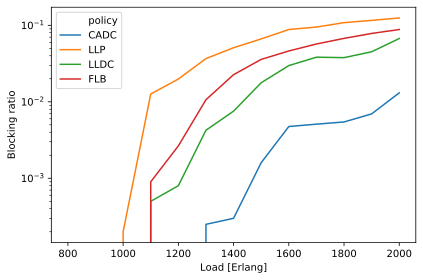

In [34]:
# plotting blocking probability
plt.figure()
sns.lineplot(x='load', y='blocking', hue='policy', data=data_avg)
plt.xlabel('Load [Erlang]')
plt.ylabel('Blocking ratio')
plt.yscale('log')
plt.tight_layout()
plt.savefig(f'{output_folder}blocking_ratio.{output_format}')

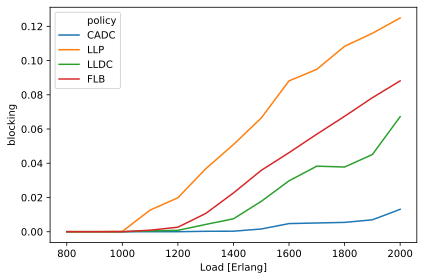

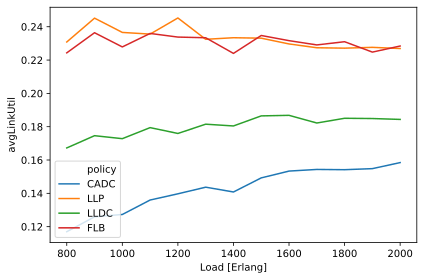

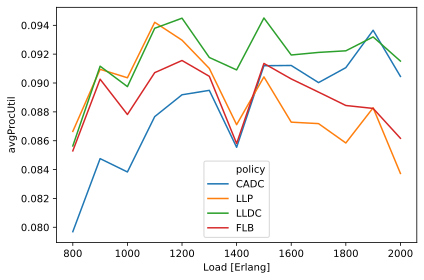

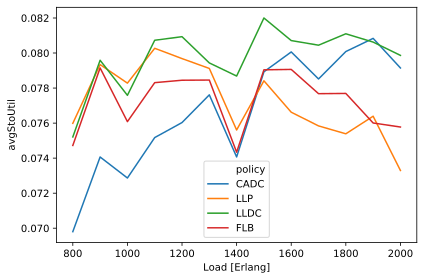

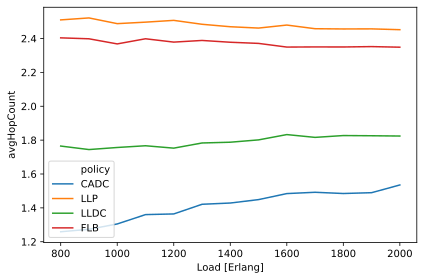

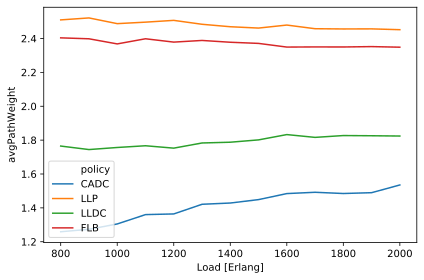

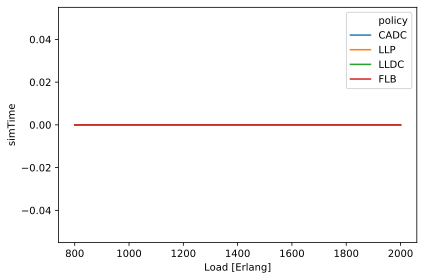

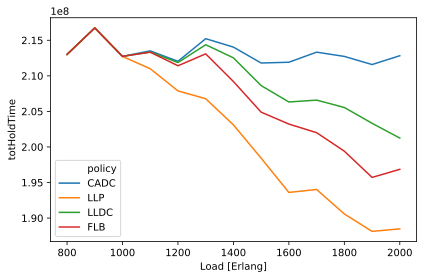

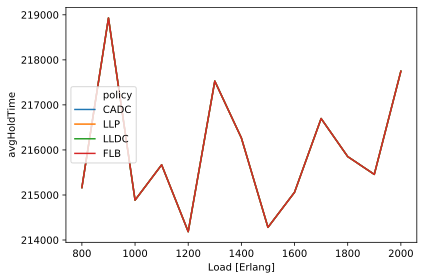

In [35]:
loads = sorted(data_avg['load'].unique())
for metric in data_avg.columns:
    if metric not in ['policy', 'load']:
        plt.figure()
        sns.lineplot(x='load', y=metric, hue='policy', data=data_avg)
        plt.xlabel('Load [Erlang]')
        plt.ylabel(metric)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'{output_folder}{metric}.{output_format}')
        plt.show()

## Reading results from the individual results file

Besides the file with average results for each scenario, the simulator also saves a file with each individual experiment (seed).
This file can be used to extract statistics more refined than the averages already provided.

In [36]:
# load results file

# uncomment the following line to enable loading the latest results
# avg_results_file = os.path.join(root_results_path, folder) + 'results-exp-test-load.csv'

# default value for this repository:
avg_results_file = '../../data/results-test-load.csv'

data_exp = pd.read_csv(avg_results_file, index_col=False).astype({'exp': 'int32', 'load': 'int32'})

print('Data loaded:')
for c in data_exp.columns:
    print('\t', c)

Data loaded:
	 policy
	 exp
	 load
	 blocking
	 avgLinkUtil
	 avgProcUtil
	 avgStoUtil
	 avgHopCount
	 avgPathWeight
	 simTime
	 totHoldTime
	 avgHoldTime


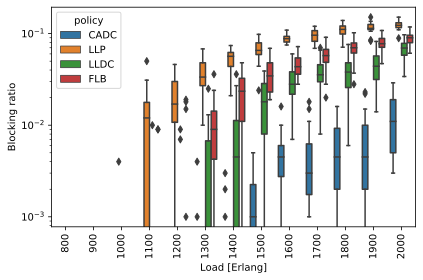

In [37]:
# generating a box plot for the blocking probability
plt.figure()
sns.boxplot(x='load', y='blocking', hue='policy', data=data_exp)
plt.xlabel('Load [Erlang]')
plt.ylabel('Blocking ratio')
plt.xticks(rotation=90)
plt.yscale('log')
plt.tight_layout()
plt.savefig(f'{output_folder}box_blocking_ratio.{output_format}')

# plt.figure()
# sns.lineplot(x='load', y='blocking', hue='policy', data=data_avg)
# plt.xlabel('Load [Erlang]')
# plt.ylabel('Blocking ratio')
# plt.yscale('log')
# plt.tight_layout()
# plt.savefig(f'{output_folder}blocking.{output_format}')

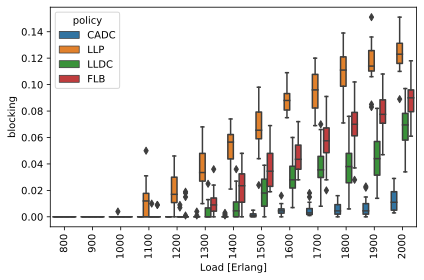

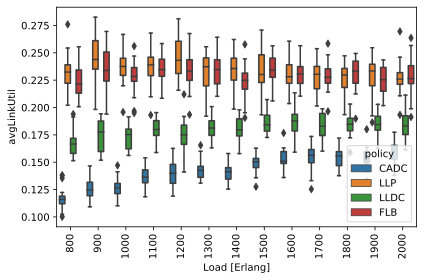

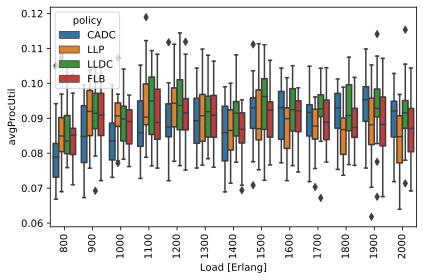

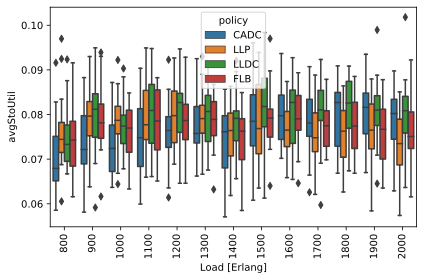

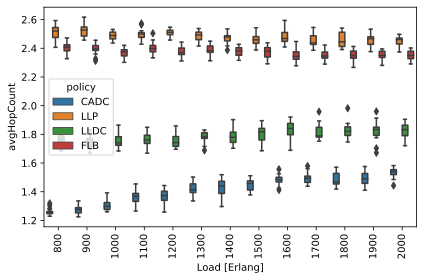

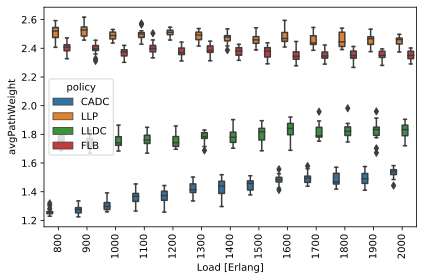

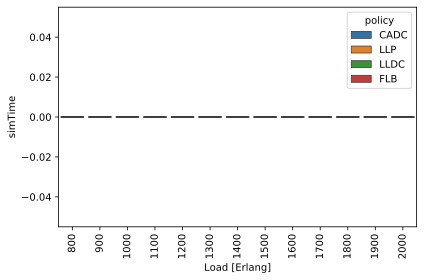

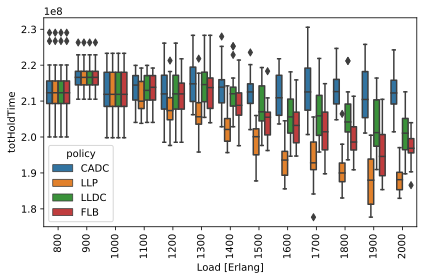

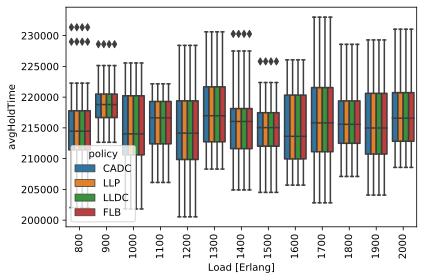

In [38]:
for metric in data_exp.columns:
    if metric not in ['policy', 'load', 'exp']:
        plt.figure()
        sns.boxplot(x='load', y=metric, hue='policy', data=data_exp)
        plt.xlabel('Load [Erlang]')
        plt.ylabel(metric)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'{output_folder}box_{metric}.{output_format}')
        plt.show()